In [50]:
options(jupyter.plot_mimetypes = "image/png")
library(nlme)
library(ggplot2)
library(corrplot)
library(gridExtra)
library(grid)
library(data.table)
library(effects)
library(xtable)
library(extrafont)
library(lsmeans)
library(multcomp)


## Load Data

In [51]:
data = read.csv("../data_meta_analysis/Data_Classifications_v7.csv")

data<-data[c('PID','Info.type','Accuracy.50','Significance','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')]

factors<-c('Info.type','Significance','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')

for (pid in unique(data$PID)){
    #print('--')
    #print(pid)
    #print(nrow(data1[data1$PID==pid,]))
    #print('--')
    data[data$PID==pid,'n_per_study']=nrow(data[data$PID==pid,])
}


# msc

#R1 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_before_clustering_2.csv"))
#R2 = read.csv(paste("X_region1_after_clustering.csv"))
#R3 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_after_clustering_lr_2.csv"))
#R4 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_after_clustering2_2.csv"))
R5 = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_combined_regs.csv"))

#R1names = colnames(R1)
#R2names = colnames(R2)
#R3names = colnames(R3)
#R4names = colnames(R4)
R5names = colnames(R5)

# i=1
# for (name in R3names){
#     R3names[i]<-paste(sep='','R3',name)
#     i=i+1
# }
# R3names
# colnames(R3)<-R3names
# #head(R3)



In [52]:
data = cbind(data,R5) # will bind with other region names too 


# mscl fixed 
data<-data[!data$Classifier.type=='neural-net',] # no observations but still has a level
data[data$Scanner=='4T','Scanner']='3T' # only one observatoin with 3T

data$PID<-as.factor(data$PID)
data$Info.type<-as.factor(data$Info.type)
data$Smoothing<-as.factor(data$Smoothing)
data$Roi.Search<-as.factor(data$Roi.Search)
data$Classifier.type<-as.factor(data$Classifier.type)
data$Coregistration<-as.factor(data$Coregistration)
data$Pattern.type<-as.factor(data$Pattern.type)

#data[data$Pattern.normalization.type=='Normalized Spatially']

data$Pattern.normalization.type<-as.factor(data$Pattern.normalization.type)

data<-droplevels(data)


data_50<-subset(data,!is.na(Accuracy.50))
data_50_non<-subset(data,!is.na(Accuracy.50)& Significance==0)
data_50_sig<-subset(data,!is.na(Accuracy.50) & Significance==1)
head(data_50_sig)
nrow(data_50_sig)


,PID,Info.type,Accuracy.50,Significance,Roi.Search,Pattern.type,Classifier.type,Scanner,Smoothing,Coregistration,Pattern.normalization.type,Num_subs,n_per_study,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,Frontal_Inf_Oper_L,Frontal_Inf_Oper_R,Frontal_Inf_Tri_L,Frontal_Inf_Tri_R,Frontal_Inf_Orb_L,Frontal_Inf_Orb_R,Supp_Motor_Area_L,Supp_Motor_Area_R,Frontal_Sup_Medial_L,Frontal_Sup_Medial_R,Insula_L,Insula_R,Cingulum_Ant_L,Cingulum_Ant_R,Cingulum_Mid_L,Cingulum_Mid_R,Precentral_L,Precentral_R,Frontal_Sup_Medial_L.Frontal_Sup_Medial_R,Cingulum_Mid_L.Cingulum_Mid_R,Frontal_Mid_L.Frontal_Mid_R,Precentral_L.Precentral_R,Frontal_Inf_Orb_L.Frontal_Inf_Orb_R,Insula_L.Insula_R,Frontal_Inf_Tri_L.Frontal_Inf_Tri_R,Frontal_Inf_Oper_R.Precentral_R,Frontal_Inf_Oper_R.Frontal_Inf_Tri_R,Cingulum_Ant_L.Cingulum_Ant_R,Frontal_Sup_L.Frontal_Sup_R,Supp_Motor_Area_L.Supp_Motor_Area_R,Frontal_Inf_Oper_L.Frontal_Inf_Oper_R,Frontal_Mid_R.Frontal_Inf_Tri_R,Frontal_Mid_Orb_L.Frontal_Mid_Orb_R
2,93,Perceptual,0.52,1,ROI,Single Trial Multi-Time Point,svm-lin,3T,smoothed,coregistered,Normalized Temporally,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,93,Perceptual,0.52,1,ROI,Single Trial Multi-Time Point,svm-lin,3T,smoothed,coregistered,Normalized Temporally,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,93,Perceptual,0.52,1,ROI,Single Trial Multi-Time Point,svm-lin,3T,smoothed,coregistered,Normalized Temporally,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,93,Perceptual,0.52,1,ROI,Single Trial Multi-Time Point,svm-lin,3T,smoothed,coregistered,Normalized Temporally,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,93,Perceptual,0.525,1,ROI,Single Trial Multi-Time Point,svm-lin,3T,smoothed,coregistered,Normalized Temporally,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,93,Perceptual,0.53,1,ROI,Single Trial Multi-Time Point,svm-lin,3T,smoothed,coregistered,Normalized Temporally,21,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1] 506

## Mixed Effects, Sig, All Factors - more regions

In [53]:
# remove some pairs of regions 
# used in a later analysis
R5names = R5names[R5names!='Cingulum_Mid_R']
R5names = R5names[R5names!='Frontal_Mid_R.Frontal_Inf_Tri_L']
R5names = R5names[R5names!='Frontal_Mid_L.Precentral_R']
R5names = R5names[R5names!='Cingulum_Ant_R.Cingulum_Mid_R']
R5names = R5names[R5names!='Frontal_Sup_R.Frontal_Sup_Medial_R  ']
R5names = R5names[R5names!='Frontal_Sup_L.Frontal_Sup_Medial_L']
R5names = R5names[R5names!='Frontal_Inf_Tri_R.Frontal_Inf_Orb_R']
R5names = R5names[R5names!='Frontal_Sup_R.Frontal_Sup_Medial_R']
R5names = R5names[R5names!='Frontal_Inf_Oper_R.Precentral_L']
R5names = R5names[R5names!='Frontal_Inf_Oper_R.Precentral_R']
R5names = R5names[R5names!='Frontal_Mid_R.Frontal_Inf_Tri_R']
R5names = R5names[R5names!='Frontal_Inf_Oper_R.Frontal_Inf_Tri_R']


In [54]:
d<-data_50_sig[c('Accuracy.50','PID',factors,R5names)]
d=d[rowSums(d[,R5names])==1,] # remove rows with no region regressor (would have been 2+)
nrow(d)

[1] 422

In [55]:
factors<-c('Info.type','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')


In [56]:
R1names_string<-c()
r=1
for (R in R5names){
    # don't add last name - to prevent overparameterization. 
    if(r<length(R5names)){
    R1names_string<-paste(R1names_string,R,sep='+')
    }
    r<-r+1 
}
for (f in factors){
    R1names_string<-paste(R1names_string,f,sep='+')
    
}

R1names_string<-substring(R1names_string, 2)
R1names_string

[1] "Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R+Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R+Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R+Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Precentral_L+Precentral_R+Frontal_Sup_Medial_L.Frontal_Sup_Medial_R+Cingulum_Mid_L.Cingulum_Mid_R+Frontal_Mid_L.Frontal_Mid_R+Precentral_L.Precentral_R+Frontal_Inf_Orb_L.Frontal_Inf_Orb_R+Insula_L.Insula_R+Frontal_Inf_Tri_L.Frontal_Inf_Tri_R+Cingulum_Ant_L.Cingulum_Ant_R+Frontal_Sup_L.Frontal_Sup_R+Supp_Motor_Area_L.Supp_Motor_Area_R+Frontal_Inf_Oper_L.Frontal_Inf_Oper_R+Info.type+Roi.Search+Pattern.type+Classifier.type+Scanner+Smoothing+Coregistration+Pattern.normalization.type+Num_subs"

In [57]:
R5names[37]

[1] "Frontal_Mid_Orb_L.Frontal_Mid_Orb_R"

In [58]:
R5names

[1] "Frontal_Sup_L"                            
 [2] "Frontal_Sup_R"                            
 [3] "Frontal_Sup_Orb_L"                        
 [4] "Frontal_Sup_Orb_R"                        
 [5] "Frontal_Mid_L"                            
 [6] "Frontal_Mid_R"                            
 [7] "Frontal_Mid_Orb_L"                        
 [8] "Frontal_Mid_Orb_R"                        
 [9] "Frontal_Inf_Oper_L"                       
[10] "Frontal_Inf_Oper_R"                       
[11] "Frontal_Inf_Tri_L"                        
[12] "Frontal_Inf_Tri_R"                        
[13] "Frontal_Inf_Orb_L"                        
[14] "Frontal_Inf_Orb_R"                        
[15] "Supp_Motor_Area_L"                        
[16] "Supp_Motor_Area_R"                        
[17] "Frontal_Sup_Medial_L"                     
[18] "Frontal_Sup_Medial_R"                     
[19] "Insula_L"                                 
[20] "Insula_R"                                 
[21] "Cingulum_Ant_L"                           
[22] "Cingulum_Ant_R"                           
[23] "Cingulum_Mid_L"                           
[24] "Precentral_L"                             
[25] "Precentral_R"                             
[26] "Frontal_Sup_Medial_L.Frontal_Sup_Medial_R"
[27] "Cingulum_Mid_L.Cingulum_Mid_R"            
[28] "Frontal_Mid_L.Frontal_Mid_R"              
[29] "Precentral_L.Precentral_R"                
[30] "Frontal_Inf_Orb_L.Frontal_Inf_Orb_R"      
[31] "Insula_L.Insula_R"                        
[32] "Frontal_Inf_Tri_L.Frontal_Inf_Tri_R"      
[33] "Cingulum_Ant_L.Cingulum_Ant_R"            
[34] "Frontal_Sup_L.Frontal_Sup_R"              
[35] "Supp_Motor_Area_L.Supp_Motor_Area_R"      
[36] "Frontal_Inf_Oper_L.Frontal_Inf_Oper_R"    
[37] "Frontal_Mid_Orb_L.Frontal_Mid_Orb_R"

In [59]:
R1names_string

[1] "Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R+Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R+Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R+Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Precentral_L+Precentral_R+Frontal_Sup_Medial_L.Frontal_Sup_Medial_R+Cingulum_Mid_L.Cingulum_Mid_R+Frontal_Mid_L.Frontal_Mid_R+Precentral_L.Precentral_R+Frontal_Inf_Orb_L.Frontal_Inf_Orb_R+Insula_L.Insula_R+Frontal_Inf_Tri_L.Frontal_Inf_Tri_R+Cingulum_Ant_L.Cingulum_Ant_R+Frontal_Sup_L.Frontal_Sup_R+Supp_Motor_Area_L.Supp_Motor_Area_R+Frontal_Inf_Oper_L.Frontal_Inf_Oper_R+Info.type+Roi.Search+Pattern.type+Classifier.type+Scanner+Smoothing+Coregistration+Pattern.normalization.type+Num_subs"

# Coefficients

In [60]:
full_model<-lme(as.formula(paste('Accuracy.50~',R1names_string,sep='')),random=~1|PID,data=d,method='REML')
summary(full_model)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),6.482981e-01,9.385795e-02,3.120000e+02,6.907226e+00,2.780585e-11
Frontal_Sup_L,0.06968698,0.06337455,312.00000000,1.09960512,0.27235194
Frontal_Sup_R,0.05938440,0.06273119,312.00000000,0.94664880,0.34455035
Frontal_Sup_Orb_L,0.04691983,0.07280808,312.00000000,0.64443157,0.51976911
Frontal_Sup_Orb_R,2.252785e-03,7.947211e-02,3.120000e+02,2.834686e-02,9.774036e-01
Frontal_Mid_L,0.05104438,0.06168350,312.00000000,0.82752089,0.40857437
Frontal_Mid_R,0.02873493,0.06210380,312.00000000,0.46269195,0.64390772
Frontal_Mid_Orb_L,0.03078866,0.06670977,312.00000000,0.46153144,0.64473898
Frontal_Mid_Orb_R,0.01440372,0.07112141,312.00000000,0.20252302,0.83963986
Frontal_Inf_Oper_L,0.06413150,0.06954559,312.00000000,0.92215044,0.35716264


# Post-hoc Comparison of Coefficients 

In [61]:
lsmeans(full_model,pairwise~Classifier.type,adjust='Tukey')

# alternative way to do it
#g<-glht(full_model, linfct = mcp(Classifier.type="Tukey"))
#s<-summary(g)
#s

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


$lsmeans
 Classifier.type    lsmean         SE df  lower.CL  upper.CL
 correlation     0.7412599 0.07367844 55 0.5936050 0.8889148
 GNB             0.6312456 0.04163755 55 0.5478021 0.7146892
 LDA             0.6372220 0.06600991 55 0.5049352 0.7695089
 LogReg          0.6206712 0.03480796 55 0.5509145 0.6904279
 svm-lin         0.6239072 0.02395109 55 0.5759081 0.6719063
 svm-nonlin      0.7466389 0.03958295 55 0.6673129 0.8259649

Results are averaged over the levels of: Info.type, Roi.Search, Pattern.type, Scanner, Smoothing, Coregistration, Pattern.normalization.type 
Results are given on the + (not the response) scale. 
Confidence level used: 0.95 

$contrasts
 contrast                     estimate         SE df t.ratio p.value
 correlation - GNB         0.110014240 0.07884992 55   1.395  0.7296
 correlation - LDA         0.104037827 0.09331347 55   1.115  0.8731
 correlation - LogReg      0.120588646 0.07244118 55   1.665  0.5604
 correlation - svm-lin     0.117352673 0.06816632 

# Coefficient Plots

In [62]:
R5names

[1] "Frontal_Sup_L"                            
 [2] "Frontal_Sup_R"                            
 [3] "Frontal_Sup_Orb_L"                        
 [4] "Frontal_Sup_Orb_R"                        
 [5] "Frontal_Mid_L"                            
 [6] "Frontal_Mid_R"                            
 [7] "Frontal_Mid_Orb_L"                        
 [8] "Frontal_Mid_Orb_R"                        
 [9] "Frontal_Inf_Oper_L"                       
[10] "Frontal_Inf_Oper_R"                       
[11] "Frontal_Inf_Tri_L"                        
[12] "Frontal_Inf_Tri_R"                        
[13] "Frontal_Inf_Orb_L"                        
[14] "Frontal_Inf_Orb_R"                        
[15] "Supp_Motor_Area_L"                        
[16] "Supp_Motor_Area_R"                        
[17] "Frontal_Sup_Medial_L"                     
[18] "Frontal_Sup_Medial_R"                     
[19] "Insula_L"                                 
[20] "Insula_R"                                 
[21] "Cingulum_Ant_L"                           
[22] "Cingulum_Ant_R"                           
[23] "Cingulum_Mid_L"                           
[24] "Precentral_L"                             
[25] "Precentral_R"                             
[26] "Frontal_Sup_Medial_L.Frontal_Sup_Medial_R"
[27] "Cingulum_Mid_L.Cingulum_Mid_R"            
[28] "Frontal_Mid_L.Frontal_Mid_R"              
[29] "Precentral_L.Precentral_R"                
[30] "Frontal_Inf_Orb_L.Frontal_Inf_Orb_R"      
[31] "Insula_L.Insula_R"                        
[32] "Frontal_Inf_Tri_L.Frontal_Inf_Tri_R"      
[33] "Cingulum_Ant_L.Cingulum_Ant_R"            
[34] "Frontal_Sup_L.Frontal_Sup_R"              
[35] "Supp_Motor_Area_L.Supp_Motor_Area_R"      
[36] "Frontal_Inf_Oper_L.Frontal_Inf_Oper_R"    
[37] "Frontal_Mid_Orb_L.Frontal_Mid_Orb_R"

In [63]:
#rlabels<-c('L Superior Frontal','R Superior Frontal','L Superior Frontal orbital part','R Superior Frontal orbital par',
#        'L Middle Frontal','R Middle Frontal','L Middle Frontal orbital part','R Middle Frontal orbital part',
#          'L Inferior Frontal (oper)','R Inferior Frontal (oper)','L Inferior Frontal (tri)','R Inferior Frontal (tri)')

# Plot

In [64]:
## Get all data into table

feature='Smoothing'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Smoothing<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-dd

feature='Info.type'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Info.type<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd)

feature='Roi.Search'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Roi_or_Searchlight<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd[,1:6])

feature='Classifier.type'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Classifier.type<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd)

feature='Scanner'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Scanner.strength<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd[,1:6])

feature='Coregistration'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Coregistrated<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd[,1:6])

feature='Pattern.normalization.type'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Pattern.normalization.type<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd[,1:6])

#feature='Num_subs'
#dd<-data.frame(effect(feature,full_model))
#dd$Accuracy<-dd$fit
#dd$Feature<-dd[,feature]
#colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
#dd_all<-rbind(dd_all,dd[,1:6])

feature='Pattern.type'
dd<-data.frame(effect(feature,full_model))
dd$Accuracy<-dd$fit
dd$Pattern.normalization.type<-dd[,feature]
colnames(dd)<-c('B','fit','se','lower','upper','Accuracy')
dd_all<-rbind(dd_all,dd[,1:6])



In [65]:
### Region
fits<-c()
se<-c()
i=1
for (name in R5names){
    if(i<length(R5names)){
    ef<-effect(name,full_model)
    fits[i]<-tail(ef$fit, n=1)
    se[i]<-tail(ef$se, n=1)
    i=i+1
    }
}
dd_region = data.table(name=R5names,se=se,Accuracy=fits)


Warning message:
In data.table(name = R5names, se = se, Accuracy = fits): Item 2 is of size 36 but maximum size is 37 (recycled leaving remainder of 1 items)Warning message:
In data.table(name = R5names, se = se, Accuracy = fits): Item 3 is of size 36 but maximum size is 37 (recycled leaving remainder of 1 items)

[1] 37

In [66]:
R5names

[1] "Frontal_Sup_L"                            
 [2] "Frontal_Sup_R"                            
 [3] "Frontal_Sup_Orb_L"                        
 [4] "Frontal_Sup_Orb_R"                        
 [5] "Frontal_Mid_L"                            
 [6] "Frontal_Mid_R"                            
 [7] "Frontal_Mid_Orb_L"                        
 [8] "Frontal_Mid_Orb_R"                        
 [9] "Frontal_Inf_Oper_L"                       
[10] "Frontal_Inf_Oper_R"                       
[11] "Frontal_Inf_Tri_L"                        
[12] "Frontal_Inf_Tri_R"                        
[13] "Frontal_Inf_Orb_L"                        
[14] "Frontal_Inf_Orb_R"                        
[15] "Supp_Motor_Area_L"                        
[16] "Supp_Motor_Area_R"                        
[17] "Frontal_Sup_Medial_L"                     
[18] "Frontal_Sup_Medial_R"                     
[19] "Insula_L"                                 
[20] "Insula_R"                                 
[21] "Cingulum_Ant_L"                           
[22] "Cingulum_Ant_R"                           
[23] "Cingulum_Mid_L"                           
[24] "Precentral_L"                             
[25] "Precentral_R"                             
[26] "Frontal_Sup_Medial_L.Frontal_Sup_Medial_R"
[27] "Cingulum_Mid_L.Cingulum_Mid_R"            
[28] "Frontal_Mid_L.Frontal_Mid_R"              
[29] "Precentral_L.Precentral_R"                
[30] "Frontal_Inf_Orb_L.Frontal_Inf_Orb_R"      
[31] "Insula_L.Insula_R"                        
[32] "Frontal_Inf_Tri_L.Frontal_Inf_Tri_R"      
[33] "Cingulum_Ant_L.Cingulum_Ant_R"            
[34] "Frontal_Sup_L.Frontal_Sup_R"              
[35] "Supp_Motor_Area_L.Supp_Motor_Area_R"      
[36] "Frontal_Inf_Oper_L.Frontal_Inf_Oper_R"    
[37] "Frontal_Mid_Orb_L.Frontal_Mid_Orb_R"

In [72]:
rlabels = c('left superior frontal gyrus',
            'right superior frontal gyrus',
            'left superior frontal gyrus, orbital part',
            'right superior frontal gyrus, orbital part',
            'left middle frontal gyrus',
            'right middle frontal gyrus',
            'left middle frontal gyrus, orbital part',
            'right middle frontal gyrus, orbital part',
            'left inferior frontal gyrus, pars opercularis',
            'right inferior frontal gyrus, pars opercularis',
            'left inferior frontal gyrus, pars triangularis',
            'right inferior frontal gyrus, pars triangularis',
            'left inferior frontal gyrus, pars orbitalis',
            'right inferior frontal gyrus, pars orbitalis',
            'left supplementary motor area',
            'right supplementary motor area',
            'left medial frontal gyrus',
            'right medial frontal gyrus',
            'left insula','right insula',
            'left anterior cingulate gyrus',
            'right anterior cingulate gyrus',
            'left midcingulate area',
            'left precentral gyrus',
            'right precentral gyrus',
            'bilateral medial frontal gyrus',   
            'bilateral midcingulate area',
            'bilateral middle frontal gyrus',
            'bilateral precentral gyrus',
            'bilateral inferior frontal gyrus, pars orbitalis',
            'bilateral insula',        
            'bilateral inferior frontal gyrus, pars triangularis',
            'bilateral anterior cingulate gyrus',
            'bilateral superior frontal gyrus',
            'bilateral supplementary motor area',
            'bilateral inferior frontal gyrus, pars opercularis',
            'bilateral middle frontal gyrus, orbital part')



In [74]:
r = 1
for (region in R5names){
    print(region)
    print(rlabels[r])
    print('')
    r=r+1
    
}

[1] "Frontal_Sup_L"
[1] "left superior frontal gyrus"
[1] ""
[1] "Frontal_Sup_R"
[1] "right superior frontal gyrus"
[1] ""
[1] "Frontal_Sup_Orb_L"
[1] "left superior frontal gyrus, orbital part"
[1] ""
[1] "Frontal_Sup_Orb_R"
[1] "right superior frontal gyrus, orbital part"
[1] ""
[1] "Frontal_Mid_L"
[1] "left middle frontal gyrus"
[1] ""
[1] "Frontal_Mid_R"
[1] "right middle frontal gyrus"
[1] ""
[1] "Frontal_Mid_Orb_L"
[1] "left middle frontal gyrus, orbital part"
[1] ""
[1] "Frontal_Mid_Orb_R"
[1] "right middle frontal gyrus, orbital part"
[1] ""
[1] "Frontal_Inf_Oper_L"
[1] "left inferior frontal gyrus, pars opercularis"
[1] ""
[1] "Frontal_Inf_Oper_R"
[1] "right inferior frontal gyrus, pars opercularis"
[1] ""
[1] "Frontal_Inf_Tri_L"
[1] "left inferior frontal gyrus, pars triangularis"
[1] ""
[1] "Frontal_Inf_Tri_R"
[1] "right inferior frontal gyrus, pars triangularis"
[1] ""
[1] "Frontal_Inf_Orb_L"
[1] "left inferior frontal gyrus, pars orbitalis"
[1] ""
[1] "Frontal_Inf_Orb_R"
[

In [69]:
alabels = c('smoothed','unsmooth',
            'perceptual','response','rule','value',
            'roi','searchlight peak',
            'correlation','gnb','lda','logreg','svm-lin','svm-nonlin',
            '3T','7T',
            'coregistered','native space',
            'no normalization','normalized spatially','normalized temporally',
            'averaging across TRs and trials','averaging across trials',
            'averaging across TRs','no temporal averaging')

pdf 
  2

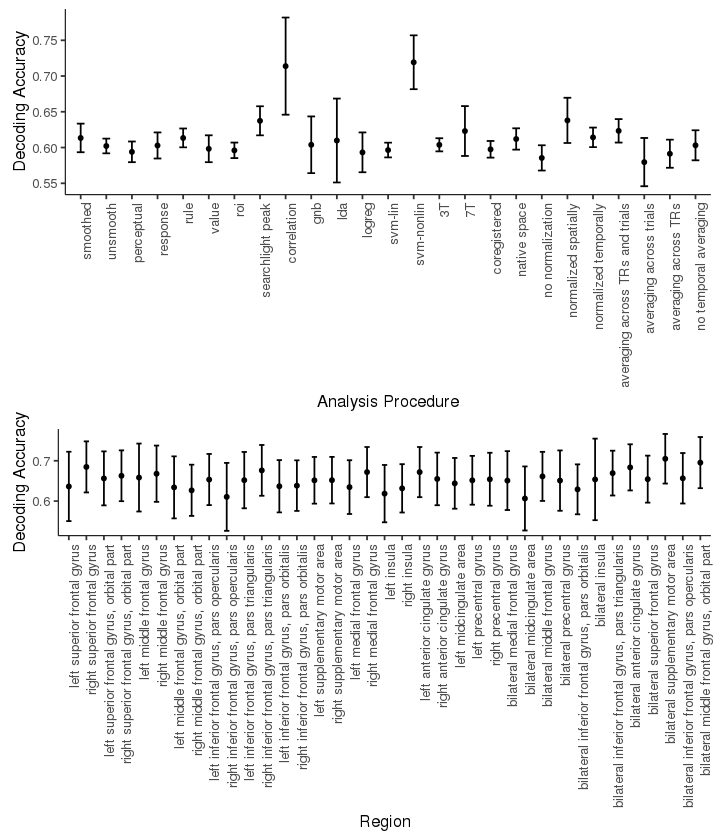

In [75]:

### Plot 

## Analysis Features 
p1 <-ggplot(aes(y = Accuracy, x = B,ymax = Accuracy + se, ymin=Accuracy - se), 
            data = dd_all) +
geom_point(size=1)+geom_errorbar(width=0.3)

## Regions
p10 <- ggplot(aes(y = Accuracy, x = name,ymax = Accuracy + se, ymin=Accuracy - se), 
              data = dd_region) +
geom_point(size=1)+geom_errorbar(width=0.3)

p10<-p10+scale_x_discrete(labels=rlabels)
p10<-p10+xlab('Region')
p10<-p10+ylab('Decoding Accuracy')
p10<-p10+theme(panel.background=element_blank())
p10<-p10+theme(axis.text.y = element_text(family="sans",size=8))
p10<-p10+theme(axis.text.x = element_text(family="sans",angle = 90, hjust = 1,size=8))
p10<-p10+theme(plot.title = element_text(family="sans",size=10))
p10<-p10+theme(axis.title.x = element_text(family="sans",size=10))
p10<-p10+theme(axis.title.y = element_text(family="sans",size=10))
p10<-p10+theme(axis.line.x = element_line(color="black", size = .3),
        axis.line.y = element_line(color="black", size = .3))

p1<-p1+xlab('Analysis Procedure')
p1<-p1+ylab('Decoding Accuracy')
p1<-p1+theme(panel.background=element_blank())
p1<-p1+scale_x_discrete(labels=alabels)
p1<-p1+theme(axis.text.y = element_text(family="sans",size=8))
p1<-p1+theme(axis.text.x = element_text(family="sans",angle = 90, hjust = 1,size=8))
p1<-p1+theme(plot.title = element_text(family="sans",size=10))
p1<-p1+theme(axis.title.x = element_text(family="sans",size=10))
p1<-p1+theme(axis.title.y = element_text(family="sans",size=10))
p1<-p1+theme(axis.line.x = element_line(color="black", size = .3),
        axis.line.y = element_line(color="black", size = .3))

lay <- rbind(c(1),
            c(10))


png('../Figures/Supp/full_regression_moreregions.png',width=6,height=7,units="in",res=400)
grid.arrange(p1,p10 ,layout_matrix = lay)
dev.off()
options(repr.plot.width=6, repr.plot.height=7)
grid.arrange(p1,p10,layout_matrix = lay)

# Likelihood Ratio Tests 

In [71]:
full_model_ml<-lme(as.formula(paste('Accuracy.50~',R1names_string,sep='')),random=~1|PID,data=d,method='ML')

full_model_wo_region<-lme(Accuracy.50~Info.type+Roi.Search+Pattern.type+Classifier.type+Scanner+
                Smoothing+Coregistration+Pattern.normalization.type+Num_subs,random=~1|PID,data=d,method='ML')


full_model_wo_Classifier.type<-update(full_model_ml,.~. -Classifier.type)
full_model_wo_Info.type<-update(full_model_ml,.~. -Info.type)
full_model_wo_Smoothing<-update(full_model_ml,.~. -Smoothing)
full_model_wo_Coregistration<-update(full_model_ml,.~. -Coregistration)
full_model_wo_Pattern.normalization.type<-update(full_model_ml,.~. -Pattern.normalization.type)
full_model_wo_Num_subs<-update(full_model_ml,.~. -Num_subs)
full_model_wo_Scanner<-update(full_model_ml,.~. -Scanner)
full_model_wo_Pattern.type<-update(full_model_ml,.~. -Pattern.type)
full_model_wo_ROI<-update(full_model_ml,.~. -Roi.Search)

a <-anova(full_model_ml,full_model_wo_Classifier.type)
d<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
a <-anova(full_model_ml,full_model_wo_Info.type)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_Smoothing)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_Coregistration)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_Pattern.normalization.type)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_Num_subs)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_Scanner)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_Pattern.type)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_ROI)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])
a <-anova(full_model_ml,full_model_wo_region)
d_new<-data.frame(a)[c('Model','df','AIC','BIC','logLik','L.Ratio','p.value')]
d<-rbind(d,d_new[2,])

d


,Model,df,AIC,BIC,logLik,L.Ratio,p.value
full_model_ml,1,57,-1089.063,-858.4972,601.5313,NA,NA
full_model_wo_Classifier.type,2,52,-1082.195,-871.8547,593.0975,16.86751,0.004758049
full_model_wo_Info.type,2,54,-1093.548,-875.1178,600.7741,1.514407,0.6789491
full_model_wo_Smoothing,2,56,-1090.698,-864.1774,601.3488,0.3648456,0.5458273
full_model_wo_Coregistration,2,56,-1090.173,-863.6523,601.0863,0.8898756,0.345511
full_model_wo_Pattern.normalization.type,2,55,-1090.132,-867.6564,600.0658,2.930813,0.2309841
full_model_wo_Num_subs,2,56,-1090.64,-864.1202,601.3202,0.4220283,0.5159267
full_model_wo_Scanner,2,56,-1090.613,-864.0926,601.3064,0.4496448,0.5025037
full_model_wo_Pattern.type,2,54,-1091.421,-872.9911,599.7107,3.641078,0.3029205
full_model_wo_ROI,2,56,-1087.276,-860.7554,599.6378,3.786852,0.05165672
